# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

<Figure size 1000x600 with 0 Axes>

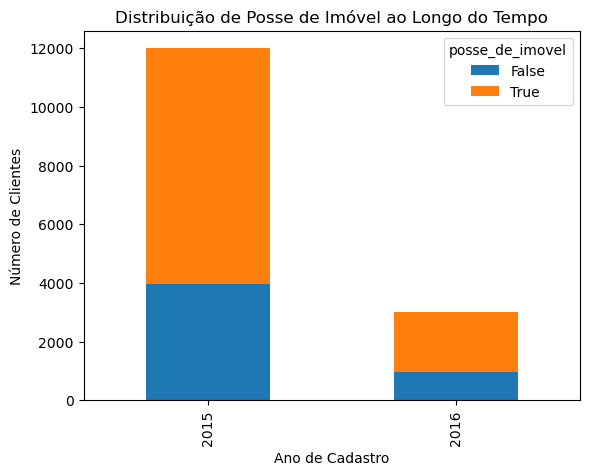

<Figure size 1000x600 with 0 Axes>

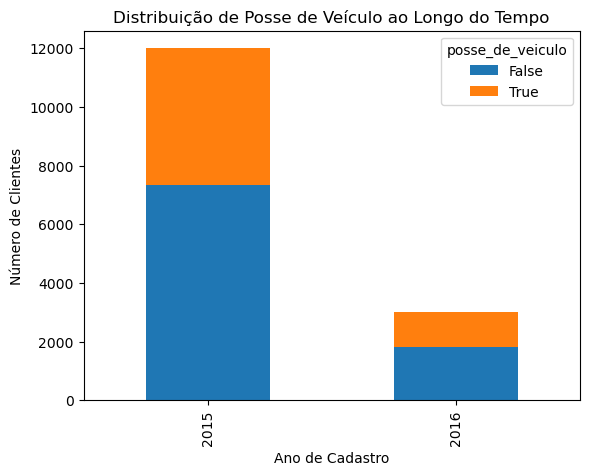

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('previsao_de_renda.csv')

# Extrair o ano da coluna 'data_ref'
df['ano_cadastro'] = pd.to_datetime(df['data_ref']).dt.year

# Criar gráfico de barras para 'posse_de_imovel' no tempo (ano_cadastro)
plt.figure(figsize=(10, 6))
df.groupby(['ano_cadastro', 'posse_de_imovel']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribuição de Posse de Imóvel ao Longo do Tempo')
plt.ylabel('Número de Clientes')
plt.xlabel('Ano de Cadastro')
plt.show()

# Criar gráfico de barras para 'posse_de_veiculo' no tempo (ano_cadastro)
plt.figure(figsize=(10, 6))
df.groupby(['ano_cadastro', 'posse_de_veiculo']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribuição de Posse de Veículo ao Longo do Tempo')
plt.ylabel('Número de Clientes')
plt.xlabel('Ano de Cadastro')
plt.show()


A principal mudança a ser investigada é a queda no número de cadastros nos anos seguintes (2014 e 2015). Pode ser importante entender o motivo por trás disso. Poderiam haver fatores externos, como mudanças no processo de cadastro, alterações econômicas ou políticas que impactaram o comportamento de compra de imóveis e veículos.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

<Figure size 1200x600 with 0 Axes>

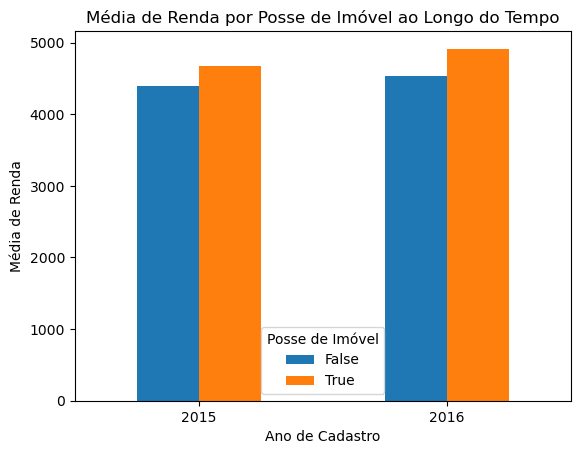

<Figure size 1200x600 with 0 Axes>

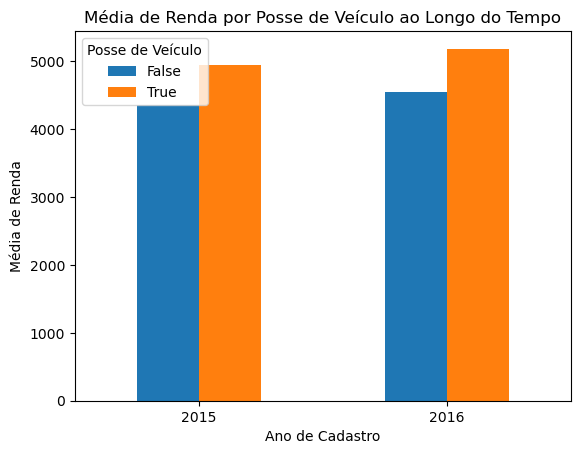

In [12]:
# Certificando-se de que o ano é extraído corretamente
df['ano_cadastro'] = pd.to_datetime(df['data_ref']).dt.year

# Calcular a média de renda por ano e posse de imóvel
mean_renda_imovel = df.groupby(['ano_cadastro', 'posse_de_imovel'])['renda'].mean().unstack()

# Calcular a média de renda por ano e posse de veículo
mean_renda_veiculo = df.groupby(['ano_cadastro', 'posse_de_veiculo'])['renda'].mean().unstack()

# Criar gráfico para posse de imóvel
plt.figure(figsize=(12, 6))
mean_renda_imovel.plot(kind='bar')
plt.title('Média de Renda por Posse de Imóvel ao Longo do Tempo')
plt.ylabel('Média de Renda')
plt.xlabel('Ano de Cadastro')
plt.xticks(rotation=0)
plt.legend(title='Posse de Imóvel')
plt.show()

# Criar gráfico para posse de veículo
plt.figure(figsize=(12, 6))
mean_renda_veiculo.plot(kind='bar')
plt.title('Média de Renda por Posse de Veículo ao Longo do Tempo')
plt.ylabel('Média de Renda')
plt.xlabel('Ano de Cadastro')
plt.xticks(rotation=0)
plt.legend(title='Posse de Veículo')
plt.show()


##### Posse de Imóvel: ##### 
A distribuição parece relativamente estável entre 2013 e 2016, com uma maioria de pessoas não possuindo imóveis (em laranja) e uma parcela menor possuindo (em azul). Não houve mudanças drásticas nessa proporção, o que indica estabilidade ao longo do tempo.

##### Posse de Veículo: #####
A posse de veículo também parece seguir um padrão semelhante, onde a maioria das pessoas não possui veículos. Novamente, a proporção parece relativamente constante ao longo dos anos analisados.

##### Conclusão #####
Sim, essas variáveis podem ser utilizadas em uma modelagem, principalmente por serem estáveis ao longo do tempo. Essa estabilidade garante que os efeitos dessas variáveis sobre o alvo predito (por exemplo, renda) não variem de maneira imprevisível, o que é desejável em modelos de previsão.